<a href="https://colab.research.google.com/github/riponalmamun/Brainwave_Matrix_Intern/blob/main/Fake_News_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download Dataset

In [101]:
!gdown --id 1EX4_PzrqYT4k6dXMj8aHCOtSvngmlW66

!gdown --id 1haVfEkSfYHzvgzIEYwYsstsiJhdiMJhg


/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1EX4_PzrqYT4k6dXMj8aHCOtSvngmlW66
To: /content/Fake.csv
100% 62.8M/62.8M [00:00<00:00, 89.9MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1haVfEkSfYHzvgzIEYwYsstsiJhdiMJhg
To: /content/True.csv
100% 53.6M/53.6M [00:00<00:00, 205MB/s]


# Import All Libraries

In [102]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer

# Import Data From Local

In [103]:
true_df = pd.read_csv(r"/content/True.csv")
fake_df = pd.read_csv(r"/content/Fake.csv")
true_df['label'] = 1
fake_df['label'] = 0
df = pd.concat([true_df, fake_df], ignore_index=True)
print(true_df.columns)
print(fake_df.columns)

Index(['title', 'text', 'subject', 'date', 'label'], dtype='object')
Index(['title', 'text', 'subject', 'date', 'label'], dtype='object')


In [104]:
true_df.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [105]:
fake_df.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [106]:
true_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
 4   label    21417 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 836.7+ KB


In [107]:
fake_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
 4   label    23481 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 917.4+ KB


In [108]:
true_df.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [109]:
fake_df.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [110]:
true_df.describe()

,label
count,21417.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


In [111]:
fake_df.describe()

,label
count,23481.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


# Cheak Duplicate Null values

In [112]:
true_df.duplicated().sum()

206

In [113]:
fake_df.duplicated().sum()

3

In [114]:
true_df.drop_duplicates(inplace=True)

In [115]:
fake_df.drop_duplicates(inplace=True)

In [116]:
true_df.shape

(21211, 5)

In [117]:
fake_df.shape

(23478, 5)

In [118]:
true_df['label'] = 1
fake_df['label'] = 0

In [119]:
true_df.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [120]:
fake_df.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [121]:
df = pd.concat([true_df,fake_df])

In [122]:
df

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [123]:
df = df.sample(frac=1).reset_index(drop=True)

In [124]:
df

,title,text,subject,date,label
0,Heroin Addict Trump Voter Sad Now That Donald...,Pennsylvania resident Kurt Farmer was perfectl...,News,"April 5, 2017",0
1,The Worst Possible Person Just Won Alabama’s ...,Alabama s Republican runoff election for Jeff ...,News,"September 26, 2017",0
2,Honduran presidential result due at 9 pm: elec...,TEGUCIGALPA (Reuters) - Honduras will publish ...,worldnews,"December 1, 2017",1
3,FACEBOOK USER ARRESTED FOR “Offensive” Posts A...,"Only months ago, Obama s Attorney General, Lor...",left-news,"Feb 16, 2016",0
4,VIOLENT RIOT Shuts Down Free Speech Of Breitba...,PRICELESS! MILO DESTROYS Heckling Muslim Woman...,politics,"Feb 1, 2017",0
...,...,...,...,...,...
44684,RUSH LIMBAUGH: HERE’S WHY George and Laura Bus...,RUSH LIMBAUGH GOT IT WRONG EARLIER TODAY BUT M...,politics,"Nov 8, 2016",0
44685,Turkey summons German ambassador as tensions m...,BERLIN (Reuters) - Turkey summoned Germany s a...,worldnews,"September 18, 2017",1
44686,"US admits not targeting Al Nusra, then blames ...",21st Century Wire says While Russian and Syria...,US_News,"October 4, 2016",0
44687,"Traveling abroad, Trump struggles to escape cr...",RIYADH (Reuters) - President Donald Trump was ...,politicsNews,"May 20, 2017",1


In [125]:
df['label'].value_counts()

label
0    23478
1    21211
Name: count, dtype: int64

In [126]:
df.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [127]:
df['subject'].unique()

array(['News', 'worldnews', 'left-news', 'politics', 'politicsNews',
       'US_News', 'Government News', 'Middle-east'], dtype=object)

# Drop

In [128]:
df.drop(columns = ['date','subject'],inplace=True,axis=1)

In [129]:
df

,title,text,label
0,Heroin Addict Trump Voter Sad Now That Donald...,Pennsylvania resident Kurt Farmer was perfectl...,0
1,The Worst Possible Person Just Won Alabama’s ...,Alabama s Republican runoff election for Jeff ...,0
2,Honduran presidential result due at 9 pm: elec...,TEGUCIGALPA (Reuters) - Honduras will publish ...,1
3,FACEBOOK USER ARRESTED FOR “Offensive” Posts A...,"Only months ago, Obama s Attorney General, Lor...",0
4,VIOLENT RIOT Shuts Down Free Speech Of Breitba...,PRICELESS! MILO DESTROYS Heckling Muslim Woman...,0
...,...,...,...
44684,RUSH LIMBAUGH: HERE’S WHY George and Laura Bus...,RUSH LIMBAUGH GOT IT WRONG EARLIER TODAY BUT M...,0
44685,Turkey summons German ambassador as tensions m...,BERLIN (Reuters) - Turkey summoned Germany s a...,1
44686,"US admits not targeting Al Nusra, then blames ...",21st Century Wire says While Russian and Syria...,0
44687,"Traveling abroad, Trump struggles to escape cr...",RIYADH (Reuters) - President Donald Trump was ...,1


# Plotting

Text(0.5, 1.0, 'Target Dist.')

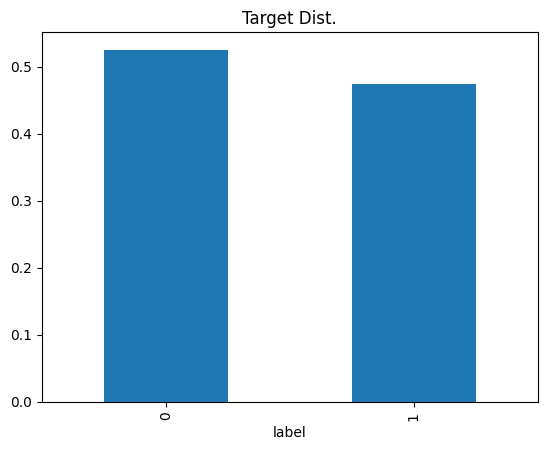

In [130]:
import matplotlib.pyplot as plt
df['label'].value_counts(normalize=True).plot(kind='bar')
plt.title('Target Dist.')

In [131]:
X = df['text']
y = df['label']

In [132]:
X.shape

(44689,)

# Data Spiliting

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Count Vectorizer For the Data

In [134]:
!pip install scikit-learn

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
X_train = cv.fit_transform(X_train)

In [135]:
X_test = cv.transform(X_test)

# Machine Learning Model

# Logistic Regression

In [136]:
lg = LogisticRegression()
lg.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [137]:
pred=lg.predict(X_test)

In [138]:
accuracy_score(y_test, pred)

0.9966435444170956

In [139]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4681
           1       1.00      1.00      1.00      4257

    accuracy                           1.00      8938
   macro avg       1.00      1.00      1.00      8938
weighted avg       1.00      1.00      1.00      8938



<Axes: >

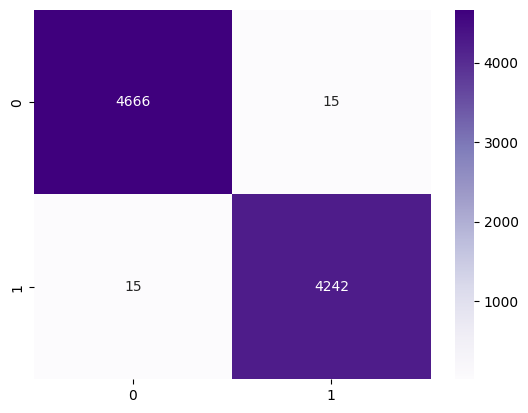

In [140]:
import seaborn as sns
cm_lg = confusion_matrix(y_test, pred)
sns.heatmap(cm_lg, annot=True, cmap="Purples", fmt="d")

# Random Forest Classification

In [141]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)

In [142]:
accuracy_score(y_test, y_pred)

0.9891474602819422

In [143]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4681
           1       0.99      0.99      0.99      4257

    accuracy                           0.99      8938
   macro avg       0.99      0.99      0.99      8938
weighted avg       0.99      0.99      0.99      8938



<Axes: >

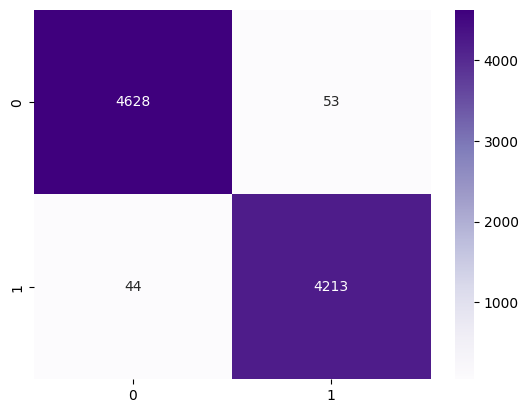

In [144]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Purples", fmt="d")

In [145]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"


def manual_testing(news, vectorization, LR, DT, GB, RF):
    testing_news = {"text": [news]} # Indent this line
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_lg = lg.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GB = GB.predict(new_xv_test)
    pred_RF = RF.predict(new_xv_test)
    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGB Prediction: {} \nRF Prediction: {}".format(output_lable(pred_lg[0]),
                                                                                                          output_lable(pred_GB[0]),
                                                                                                          output_lable(pred_RF[0])))

In [146]:
news = str(input())
manual_testing(news)

বাংলাদেশ এবং বিশ্বের সর্বশেষ খবর, প্রতিবেদন, বিশ্লেষণ, সাক্ষাৎকার, ভিডিও, অডিও এবং ফিচারের জন্য বিবিসি বাংলার ওয়েবসাইটে আসুন।


TypeError: manual_testing() missing 5 required positional arguments: 'vectorization', 'LR', 'DT', 'GB', and 'RF'